# Eurobarometr

Tentokrát budeme pracovat s daty z výzkumu veřejného mínění Eurobarometr. Ten je realizován v cca 40 zemích a lidé jsou v něm pravidelně tázání na řadu otázek. My se podíváme na tři z nich.

Přehled států EU, které jsou v průzkumu, najdeš v souboru [countries.csv](soubory_02/countries.csv). V první části úkolu můžeš pracovat se všemi státy nebo jen pro státy EU - záleží na tobě. Ve druhé a třetí části pracuj pouze se státy EU.



In [1]:
import pandas
from scipy import stats

## Inflace

V souboru `ukol_02_a.csv` najdeš procenta lidí, kteří považují inflaci a růst životních nákladů za jeden ze svých nejzávažnějších problémů. 

Data jsou za dvě období - léto 2022 (sloupec 97) a zima 2022/2023 (sloupec 98). 

Ověř, zda se procento lidí, kteří řadí inflaci mezi 2 své nejzávažnější problémy, změnilo.

Nejprve uvažuji všechny státy v průzkumu.



In [2]:
data_a = pandas.read_csv("ukol_02_a.csv")

Je vhodné provést následující postup:

- Test normality obou skupin dat. Podle toho zjistíš, zda je lepší provést parametrický nebo neparametrický test.


In [3]:
# Hypotézy jsou obdobné, pouze jednou se týkají dat z léta 2022 a jednou ze zimy 2022/2023.

# - H0: Procento lidí, kteří řadí inflaci mezi své největší problémy, má normální rozdělení
# - H1: Procento lidí, kteří řadí inflaci mezi své největší problémy, nemá normální rozdělení

In [4]:
res = stats.shapiro(data_a["98"])
res

ShapiroResult(statistic=0.9803107976913452, pvalue=0.6873015761375427)

In [5]:
res = stats.shapiro(data_a["97"])
res

ShapiroResult(statistic=0.9694535732269287, pvalue=0.33091598749160767)

In [6]:
# P-hodnota > 0.05, tj. p-hodnota je větší než 5% hladina významnosti.
# Nezamítáme hypotézu normálního rozdělení.

- Formulace hypotéz testu.


In [7]:
# H0: Průměrné procento lidí, které považuje inflaci za jeden ze svých největších problémů, se nezměnilo.
# H1: Průměrné procento lidí, které považuje inflaci za jeden ze svých největších problémů, se změnilo.

- Výběr vhodného testu. 

Vhodný je test, který jsme na lekci nepoužívali, ale je v seznamu testů, který je součástí lekce 6. 

Důležité je uvědomit si, že **porovnáváme tu samou skupinu států ve dvou různých časových obdobích**.


In [8]:
# Jedná se o párová pozorování (jeden stát, dvě období).
# Z toho důvodu použiju párový t-test.

stats.ttest_rel(data_a["97"], data_a["98"])

TtestResult(statistic=3.868878598419143, pvalue=0.00039381722579047456, df=40)

- Formulace výsledek testu (na základě p-hodnoty).

In [9]:
# p-hodnota je menší než 0.05. Zamítáme nulovou hypotézu.
# Průměrné procento lidí, kteří považují inflaci za jeden ze svých hlavních problémů, se změnilo.

Pro státy EU se p-hodnoty liší, ale postup a závěry jsou stejné.

In [10]:
countries = pandas.read_csv("countries.csv")

data_a = pandas.merge(data_a, countries)
print(stats.shapiro(data_a["98"]))
print(stats.shapiro(data_a["97"]))
stats.ttest_rel(data_a["97"], data_a["98"])

ShapiroResult(statistic=0.9399220943450928, pvalue=0.12130911648273468)
ShapiroResult(statistic=0.9521530270576477, pvalue=0.24169281125068665)


TtestResult(statistic=3.4869444202944764, pvalue=0.001753385752609159, df=26)

---

## Důvěra ve stát a v EU

Ve výzkumu je dále zkoumáno, jak moc lidé věří své národní vládě a jak moc věří EU. 

Data jsou v souboru ukol_02_b.csv. 


In [13]:
data_b = pandas.read_csv("ukol_02_b.csv")



Číslo udává procento lidí, kteří dané instituci věří. 



Ověř, zda existuje korelace mezi procentem lidí, které věří EU v každé ze zemí, a procentem lidí, kteří EU nevěří.



In [12]:
# H0: Procento lidí, kteří věří své národní vládě, má normální rozdělení
# H1: Procento lidí, kteří věří své národní vládě, nemá normální rozdělení

res = stats.shapiro(data_b["National Government Trust"])
res

ShapiroResult(statistic=0.9592156410217285, pvalue=0.14764708280563354)

In [13]:
# H0: Procento lidí, kteří věří EU, má normální rozdělení
# H1: Procento lidí, kteří věří EU, nemá normální rozdělení

res = stats.shapiro(data_b["EU Trust"])
res

ShapiroResult(statistic=0.9718669056892395, pvalue=0.3959173262119293)

In [14]:
# Normalitu nezamítáme, použijeme tedy Pearsonův test

In [15]:
# H0: Důvěra v národní vládu a důvěra v EU jsou lineárně nezávislé
# H1: Důvěra v národní vládu a důvěra v EU jsou lineárně závislé

res = stats.pearsonr(data_b["National Government Trust"], data_b["EU Trust"])
res

# Zamítáme nulovou hypotézu.
# Existuje lineární závislost mezi důvěrou v EU a důvěrou v národní vládu.

PearsonRResult(statistic=0.4620107002065491, pvalue=0.0023585837128714308)

---

## Důvěra ve stát a euro

Nakonec si rozdělíme státy EU na dvě skupiny - státy v eurozóně a státy mimo ni. 

Jak je to s důvěrou v EU? Důvěřují EU více lidé, kteří žijí ve státech platící eurem? 

Využij znovu data o důvěře v EU ze souboru `ukol_02_b.csv` a rozděl státy na ty, které jsou v eurozóně, a ty, které jsou mimo ni. 

Státy můžeš rozdělit s využitím tabulky v souboru `countries.csv`.


In [16]:
data_b = pandas.merge(data_b, countries)

data_b_euro = data_b[data_b["Euro"] == 1]
data_b_not_euro = data_b[data_b["Euro"] == 0]

Porovnej, jak se liší důvěra v EU v těchto dvou skupinách zemí. 

In [17]:
# H0: Průměrná důvěra v EU se neliší ve státech v eurozónu a ve státech mimo eurozónu
# H1: Průměrná důvěra v EU se liší ve státech v eurozónu a ve státech mimo eurozónu

In [18]:
stats.ttest_ind(data_b_euro["EU Trust"], data_b_not_euro["EU Trust"])

# p-hodnota je vyšší než 0.05, nezamítáme nulovou hypotézu.
# Neprokázali jsme, že by se důvěra v EU lišila.

Ttest_indResult(statistic=-0.33471431258258433, pvalue=0.740632683274883)

## Doplnění

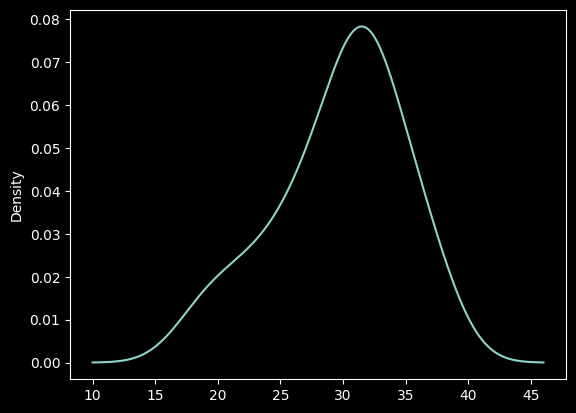

In [19]:
res = data_a["98"].plot.kde()

<Axes: ylabel='Density'>

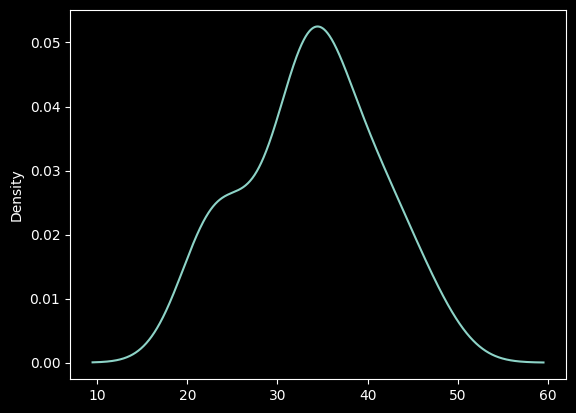

In [20]:
data_a["97"].plot.kde()